<a href="https://colab.research.google.com/github/nawanacoyle/nawanacoyle/blob/main/Copy_of_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install and setup
  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 2: Data preprocessing

In [ ]:
from sklearn import datasets, metrics


In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
x = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = cancer.target
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# Understand the shape
x.shape, y.shape

((569, 30), (569,))

In [ ]:
# Splitting the data to training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
# Undestand the shape of the datasets to see if reshaping is needed
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

# Building the model

In [ ]:
# Declaring the model object
model = tf.keras.models.Sequential()

In [ ]:
# Build the first CNN layer
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (30,1)))

# Batch normalization
model.add(tf.keras.layers.BatchNormalization())

# Add dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# Build the second CNN layer
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))

# Batch normalization
model.add(tf.keras.layers.BatchNormalization())

# Add the dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# Add flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Add the fully connected layer
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))

# Add the output later
model.add(tf.keras.layers.Dense(units =1 , activation = 'sigmoid'))

In [ ]:
# Get model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_5 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 28, 64)           

In [ ]:
# Compile model
opt = tf.keras.optimizers.Adam(learning_rate = 0.00005)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs  = 50, validation_data = (x_test, y_test))

Epoch 1/50
15/15 [==============================] - 3s 32ms/step - loss: 0.5230 - accuracy: 0.7121 - val_loss: 0.6246 - val_accuracy: 0.9561
Epoch 2/50
15/15 [==============================] - 0s 13ms/step - loss: 0.2797 - accuracy: 0.8989 - val_loss: 0.5755 - val_accuracy: 0.9386
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.2244 - accuracy: 0.9297 - val_loss: 0.5367 - val_accuracy: 0.8860
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1809 - accuracy: 0.9407 - val_loss: 0.5032 - val_accuracy: 0.8947
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1488 - accuracy: 0.9473 - val_loss: 0.4713 - val_accuracy: 0.8860
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1287 - accuracy: 0.9648 - val_loss: 0.4415 - val_accuracy: 0.8684
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1216 - accuracy: 0.9626 - val_loss: 0.4143 - val_accuracy: 0.8509
Epoch 8/50
15

# Step 5: Make predictions

In [ ]:
round(3.5)

4

In [ ]:
# Make model predictions

y_pred=model.predict(x_test).round()

# y_pred=np.argmax(predict_x,axis=1)
y_pred[2], y_test[2]


4/4 [==============================] - 0s 4ms/step


(array([1.], dtype=float32), 1)

In [ ]:
y_pred[15], y_test[15]

(array([0.], dtype=float32), 0)

In [ ]:
y_pred[3], y_test[3]

(0, 1)

In [ ]:
# Evaluate the model with confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  3]
 [ 0 67]]


In [ ]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.9736842105263158


In [ ]:
# Create a plot to show the accuracy vs the validation accuracy
def ac_vs_val_ac(n_epoch):
  plt.plot(range(n_epoch), history.history['accuracy'] )
  plt.plot(range(n_epoch), history.history['val_accuracy'])
  plt.title("Accuracy vs Validation Accuracy")
  plt.legend(['Accuracy', 'Validation_accuracy'], loc = 'best')



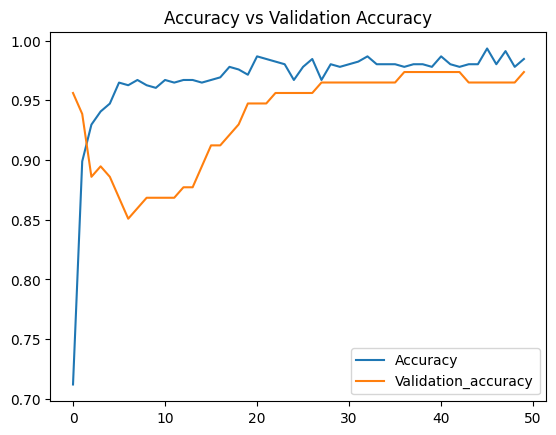

In [ ]:
ac_vs_val_ac(50);

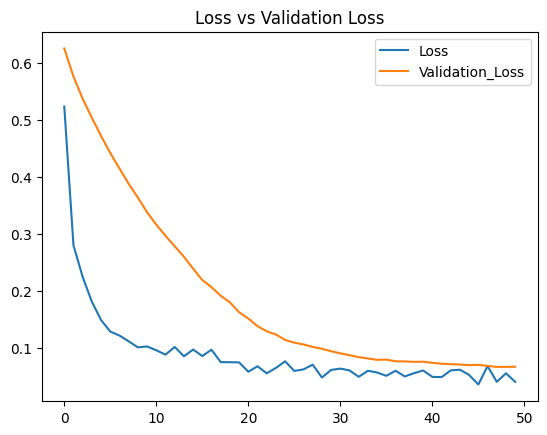

In [ ]:
#  View losses
def view_losses(n_epoch):
  plt.plot(range(n_epoch), history.history['loss'] )
  plt.plot(range(n_epoch), history.history['val_loss'])
  plt.title("Loss vs Validation Loss")
  plt.legend(['Loss', 'Validation_Loss'], loc = 'best')

view_losses(50);